### **Data Science with Python : Assignment 2**

Name : Tanaya Badve

Student Number : 20200653

### **Project Overview**

Gain insights and make analysis about the textual data extracted using **BeautifulSoup** i.e. webscrapped the data ,followed by data preparation and finally evaluation of classifiers used for training data.

## **Importing packages**

In [228]:
# Import necessary packages
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
import bs4
import csv
import pandas as pd
import numpy as np
 
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import neural_network
from sklearn import naive_bayes

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics.pairwise import linear_kernel
 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
 
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
 
 
import operator
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
 
import matplotlib
import matplotlib.pyplot as plt
# Important! Need to tell IPython to display plots within the notebook
%matplotlib inline

##**Task 1 : Data Collection**
**Stategy to web scrape content**

I have scraped the data in two parts.

* The first part will generate the list of all the monthly news article links.
* The second part will scrap the content present in each monthly link.

In [132]:
#I have written a function that will request these links to open and parse the html content using BeautifulSoup.
  


# To open the link
def open_link(baseurl,newurl):
    rawtext = urllib.request.urlopen(baseurl+newurl)
    soup = bs4.BeautifulSoup(rawtext,'html.parser')
    return soup



In [133]:
# This is the base url which will be appended with new urls got during web scraping.

baseurl='http://mlg.ucd.ie/modules/COMP41680/assignment2/'

In [134]:
# The first part of scraping to get the monthly news articles link

index_page=open_link(baseurl,'index.html')
#print(index_page)
monthly_data=index_page.find('div', attrs={'class':'list-group'}).findAll('a')
#print(monthly_data)
monthly_url=[]
for data in monthly_data:
  #print(data[0])
  try:
    a_tag=data.find_next('a')
    #print(a_tag)
    monthly_url.append(a_tag.attrs['href'])
  except:
      continue
  
print(monthly_url)

['month-feb-001.html', 'month-mar-001.html', 'month-apr-001.html', 'month-may-001.html', 'month-jun-001.html', 'month-jul-001.html', 'month-aug-001.html', 'month-sep-001.html', 'month-oct-001.html', 'month-nov-001.html', 'month-dec-001.html']


In [135]:
# The second part will scrap the inner content of each months which include title,categories and article description links
# Then open the article links and get the summary.
# I have passed the list of chosen 3 cof 9 categorise

category_elements=''
# first loop will iterate over each month
listOfCategory=['Books','US-News','Life-and-Style']
listOfArticle = []
#webDict=[]
web={}
web['Title'] =[]
web['Category']=[]
web['Description']=[]  
for url in monthly_url:
  monthly_stories=open_link(baseurl,url) # open the monthly links
  contents=monthly_stories.findAll('div', {"class":"article"}) # find all values in <div> tag
  for row_data in contents[1:]:
      lWeb =[]
      lTitle =[]
      lDes =[]
      label = row_data.find_all('p', class_='metadata')[1].text.split(":")[1].replace(" ","")
      if label in listOfCategory:
        lTitle = web['Title']
        lTitle.append(row_data.h5.text.replace('\xa0','')[2:]) # the title are in class= category
        web['Title'] = lTitle
        lWeb = web['Category']
        lWeb.append(label)
        web['Category'] = lWeb
      # print(web['Title'])
      #get_categories=row_data.find_next('p', attrs={'class':'metadata'}) # the categories are in class= category
        # web['Category']=label
      # print(web['Category'])
        lDes = web['Description']
        lDes.append(row_data.find_all('p', class_='snippet')[0].text[:-4])  # the description  are in class= title
        web['Description'] = lDes
      # print(web['Description'])
print(web)
webData = pd.DataFrame.from_dict(web)
webData.to_csv('scrappedData.csv',index=False)
# listOfArticle.append(contents)
# print(listOfArticle)
# print(len(listOfArticle))

print('******************************')
print('Done with Web Scraping')
print('******************************')

{'Title': ["Trump's impeachment trial is racing to a close. Here's what the final days will look like", 'Trump impeachment trial: senators vote against calling witnesses, paving way for acquittal – as it happened', 'Blind date: ‘Did we kiss? Copiously…’', 'Tim Dowling: our weekend trip to Devon has gone into reverse', 'Fitness tips: Royal Canadian Air Force five basic exercises (5BX)', 'Why not let Mexican writers earn the seven-figure advances?', ".Fit in my 40s: Canada's Air Force fitness drills are a retro, noisy tonic", ".'There’s zero evidence that it’s worse for children': parenting in a polyamorous relationship", ".'We can’t risk another four years of Trump': will Democrats in Iowa play it safe or go bold?", '.Between Two Fires by Joshua Yaffa review – how Putin rules Russia', '.It’s easy to dismiss boomers as know-nothings – but they got some things right, OK?', '.Claims that Prince Andrew failed to respond to FBI likely political, say prosecutors', '.How we live together: the 

## **Representing Data**

Storing data into a CSV file as a dataset and converting it into dataframe for further processing.

In [136]:
news = pd.read_csv("scrappedData.csv")
news.head(10)

,Title,Category,Description
0,Trump's impeachment trial is racing to a close...,US-News,The US Senate voted on Friday not to call witn...
1,Trump impeachment trial: senators vote against...,US-News,Summary: Live political reporting continues in...
2,Blind date: ‘Did we kiss? Copiously…’,Life-and-Style,Jack on Nabil What were you hoping for? I had ...
3,Tim Dowling: our weekend trip to Devon has gon...,Life-and-Style,"It is early on Friday afternoon, and my wife a..."
4,Fitness tips: Royal Canadian Air Force five ba...,Life-and-Style,"1 Stand with feet apart, arms stretched above ..."
5,Why not let Mexican writers earn the seven-fig...,Books,Let’s talk about cultural appropriation. Many ...
6,.Fit in my 40s: Canada's Air Force fitness dri...,Life-and-Style,The Royal Canadian Air Force Fitness Plans wer...
7,.'There’s zero evidence that it’s worse for ch...,Life-and-Style,"Almost three years ago, my partner and I decid..."
8,.'We can’t risk another four years of Trump': ...,US-News,Summary: The candidates have put in thousands ...
9,.Between Two Fires by Joshua Yaffa review – ho...,Books,The last couple of years have produced a lot o...


## **Task 2 : Binary text classification**



*   From the raw documents, I am creating a document-term matrix, using appropriate text pre-processing and term weighting steps.
*   Concatenated *title* and *description* and considering *category* as class labels for data processing.
* Data preprocessing consists of basic text data cleaning pipeline of **removing stopwords, handling punctuations,lemmatisation, bag-of-words,n-grams, vectorisation** etc is performed on data for further analysis.



#### Checking distinct terms using normal vectorizer and n-grams in the article description.

1. **Normal Vectorizer:** In this, normal CountVectorizer() function is called without passing any arguments.

2. **N-Gram Vectorizer:** In this, CountVectorizer() is passed with n-gram argument where n=2 i.e. bi-grams.

3. **CountVectorizer with Pre-Processing Text:** In this, the CountVectorizer() is passed with different pre-processing steps like  English StopWord removal , Low-frequency filtering (it will remove the words that appear in very few documents having frequency lower than specified) and Lemmatizing (it uses the existing word vocabulary and does morphological analysis). 

4. **Tf-Idf Vectorizer:** In order to improve the usefulness of the Document-Term Matrix, it is necessary to assign weights to the terms that are more important. Therefore, I will be passing the same pre-processing parameters used in above CountVectorizer with pre-processing text.

* **Why not Stemming?**

I am not using Stemming here because Stemming does not return meaningful terms and hence it may affect the accuracy.

In [137]:
# Using Bag-of-words model approach
# normal vectorizer

norm_vectorizer = CountVectorizer()
X_normal = norm_vectorizer.fit_transform(news['Description'])
print(X_normal.shape)

terms = norm_vectorizer.get_feature_names()
vocab = norm_vectorizer.vocabulary_
print("Vocabulary has %d distinct terms" % len(terms))


(200, 2106)
Vocabulary has 2106 distinct terms


In [138]:
# n-gram vectorizer

n_gram_vectorizer = CountVectorizer(ngram_range = (1,2)) # extracting single token and bigrams
X_n_gram = n_gram_vectorizer.fit_transform(news['Description'])
print(X_n_gram.shape)

terms = n_gram_vectorizer.get_feature_names()

print("Vocabulary has %d distinct terms" % len(terms))

(200, 6331)
Vocabulary has 6331 distinct terms


In [139]:

# define the function
def token_lemmatizer(text):
    # use the standard scikit-learn tokenizer first
    standard_tokenizer = CountVectorizer().build_tokenizer()
    tokens_list = standard_tokenizer(text)
    # then use NLTK to perform lemmatisation on each token
    nltk_lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatize_tokens = []
    for token in tokens_list:
        lemmatize_tokens.append( nltk_lemmatizer.lemmatize(token) )
    return lemmatize_tokens

In [140]:

# using pre-processing parameters like stopwords removal, low frequency filtering and lemmatization respectively
import nltk
nltk.download('wordnet')
lemma_vectorizer = CountVectorizer(stop_words="english",min_df = 5,tokenizer= token_lemmatizer)
X_lemma = lemma_vectorizer.fit_transform(news['Description'])
print(X_lemma.shape)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
(200, 51)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [141]:
# pass the same preprocessing parameters which were passed in above cell
tfidf_vectorizer = TfidfVectorizer(stop_words="english",min_df = 5, tokenizer= token_lemmatizer)
X_tfidf = tfidf_vectorizer.fit_transform(news['Description'])
print(X_tfidf.shape)

(200, 51)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [142]:
# using pre-processing parameters like stopwords removal, low frequency filtering and lemmatization respectively

lemma_vectorizer = CountVectorizer(stop_words="english",min_df = 5,tokenizer=token_lemmatizer)
X_lemma = lemma_vectorizer.fit_transform(news['Description'])
print(X_lemma.shape)

(200, 51)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


#### **Measuring Similarity**

* Similarity between different documents can be found using **Cosine Similarity** measure. 
* Taking into consideration  similarity for first document with rest of the documents in the file and trying this on the different vectorizer models I used above.

In [143]:
# To measure the cosine similarity between the first document and rest others for normal_vectorizer
max_cosine = 0
similar_row = 0
for row in range(1,X_normal.shape[0]):
    cos_result = cosine_similarity( X_normal[0], X_normal[row] )
    # best so far?
    if cos_result > max_cosine:
        max_cosine = cos_result
        similar_row = row
print("Most similar document was row %d: cosine similarity = %.3f" % ( similar_row, max_cosine ) )

print(news['Category'][similar_row])
print(news['Description'][similar_row][0:300])

Most similar document was row 1: cosine similarity = 0.447
US-News
Summary: Live political reporting continues in Monday’s blog: Senators defeated a proposal to hear witnesses in the impeachment trial of Donald Trump. Only t


In [144]:
# To measure the cosine similarity between the first document and rest others for n-gram vectorizer
max_cosine = 0
similar_row = 0
for row in range(1,X_n_gram.shape[0]):
    cos_result = cosine_similarity( X_n_gram[0], X_n_gram[row] )
    # best so far?
    if cos_result > max_cosine:
        max_cosine = cos_result
        similar_row = row
print("Most similar document was row %d: cosine similarity = %.3f" % ( similar_row, max_cosine ) )

print(news['Category'][similar_row])
print(news['Description'][similar_row][0:300])

Most similar document was row 1: cosine similarity = 0.302
US-News
Summary: Live political reporting continues in Monday’s blog: Senators defeated a proposal to hear witnesses in the impeachment trial of Donald Trump. Only t


In [145]:
# To measure the cosine similarity between the first document and rest others for lemma-vectorizer
max_cosine = 0
similar_row = 0
for row in range(1,X_lemma.shape[0]):
    cos_result = cosine_similarity( X_lemma[0], X_lemma[row] )
    # best so far?
    if cos_result > max_cosine:
        max_cosine = cos_result
        similar_row = row
print("Most similar document was row %d: cosine similarity = %.3f" % ( similar_row, max_cosine ) )

print(news['Category'][similar_row])
print(news['Description'][similar_row][0:300])

Most similar document was row 48: cosine similarity = 0.802
US-News
The rise in Donald Trump’s approval ratings – it would be misleading to call it a surge – appears to have shocked his opponents. Critics in the Demo


In [146]:
# To measure the cosine similarity between the first document and rest others for tfidf vectorizer
max_cosine = 0
similar_row = 0
for row in range(1,X_tfidf.shape[0]):
    cos_result = cosine_similarity( X_tfidf[0], X_tfidf[row] )
    # best so far?
    if cos_result > max_cosine:
        max_cosine = cos_result
        similar_row = row
print("Most similar document was row %d: cosine similarity = %.3f" % ( similar_row, max_cosine ) )

print(news['Category'][similar_row])
print(news['Description'][similar_row][0:300])

Most similar document was row 55: cosine similarity = 0.736
US-News
Donald Trump has admitted the US government’s emergency stockpile of protective equipment is nearly exhausted because of the extraordinary demands 


 **Here the normal vectorizer model and n-gram vectorizer model returns the same index document as similar but with different cosine values, whereas, the other two vectorizer model finds different document as similar.However, the last two vectorizers return the match with same news-category as that of first document. This is because, each vectorizer model here is having different or no parameters for processing, and in last two vectorizer we do some pre-processing on the text which helps in identifing similar category document. You can decide what all pre-processing is required as per target requirements.**

#### **Vectorizers used for document-term matrix**. 
These outputs will be used for predicting the documents using different evaluation techniques of Classification models.

* TfidfVectorizer() 
* CountVectorizer() ( Vectorizer with Pre-Processing)

#### **Evaluation techniques**

* One-way HoldOut Strategy (Train and Test Split)
* K-Fold Cross Validation

 ### **Exploratory Data Analysis for textual data**

### Class labels : News category

In [147]:
news['Category'].value_counts()


US-News           74
Life-and-Style    64
Books             62
Name: Category, dtype: int64

In [148]:
# Associate Category names with numerical index and save it in new column category_id
news['Category_id'] = news['Category'].factorize()[0]

In [149]:
# Create a new pandas dataframe "category_id_df", which only has unique Categories, also sorting this list in order of category_id values
category_id_df = news[['Category', 'Category_id']].sort_values('Category_id')

In [150]:

# Create a dictionary ( python datastructure - like a lookup table) that 
# can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Category_id', 'Category']].values)

In [151]:
id_to_category

{0: 'US-News', 1: 'Life-and-Style', 2: 'Books'}

In [152]:
category_id_df


,Category,Category_id
0,US-News,0
125,US-News,0
122,US-News,0
121,US-News,0
118,US-News,0
...,...,...
44,Books,2
142,Books,2
141,Books,2
47,Books,2


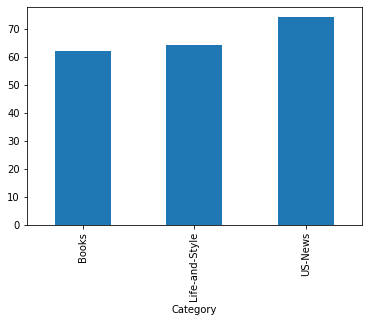

In [153]:
#Plot the distribution of news articles by category
news.groupby('Category').Category_id.count().plot.bar(ylim=0)

From above analysis of target variable,we could easily conclude that the data is not class imbalanced.

### **Brief Text cleaning pipeline**

In [154]:
# Data Cleaning
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    
    return text

In [155]:
# creating clean text feature
import re
news['Description'] = news['Description'].apply(clean_text)

In [156]:
# stopwords-to compare text data with and without stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))


# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
news['Description'] = news['Description'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


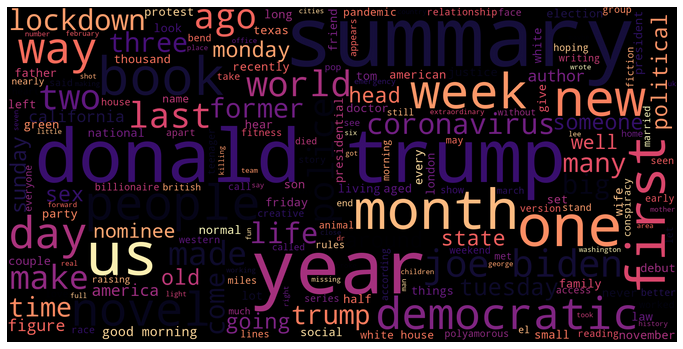

In [157]:
# Import package
from wordcloud import WordCloud, STOPWORDS


text = " ".join(review for review in news.Description)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [158]:
wordcloud.to_file("wordcloud.png")


In [159]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=token_lemmatizer, max_features=10000, use_idf=True)

features = tfidf_vec.fit_transform(news.Description).toarray() # Remaps the words in the 200 articles in the text column of 
                                                  # data frame into features (superset of words) with an importance assigned 
                                                  # based on each words frequency in the document and across documents

labels = news.Category_id 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [160]:
# Remember the dictionary created to map category names to a number ? 
category_to_id.items()

dict_items([('US-News', 0), ('Life-and-Style', 1), ('Books', 2)])

# **Task 3**

Deeper insights in terms of features or keywords extracted out of unigrams and bigrams.

In [161]:
from sklearn.feature_selection import chi2

N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
    indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names = np.array(tfidf_vec.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
    print("# '{}':".format(category))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'Books':
  . Most correlated unigrams:
       . author
       . novel
       . book
  . Most correlated bigrams:
       . rare book
       . new world
       . died aged
# 'Life-and-Style':
  . Most correlated unigrams:
       . donald
       . trump
       . ago
  . Most correlated bigrams:
       . active sex
       . donald trump
       . year ago
# 'US-News':
  . Most correlated unigrams:
       . democratic
       . donald
       . trump
  . Most correlated bigrams:
       . good morning
       . joe biden
       . donald trump


In [162]:
features_chi2

(array([0.35907204, 0.35907204, 0.11527313, ..., 0.1144114 , 0.12690947,
        0.12690947]),
 array([0.54902205, 0.54902205, 0.73421881, ..., 0.73517665, 0.72165817,
        0.72165817]))

In [163]:
news.info()
#news.drop(news['Category'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        200 non-null    object
 1   Category     200 non-null    object
 2   Description  200 non-null    object
 3   Category_id  200 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


Concatenating *Title* and *Description*.Keeping *combined* document as independent variable and class label i.e. *category* as target variable.

In [164]:
news['combined'] = news['Title'].str.cat(news['Description'],sep=" ")

In [165]:
X = news.loc[:,'combined']
y = news.loc[:,'Category_id']

In [166]:
# pass the same preprocessing parameters which were passed in above cell
tfidf_vectorizer = TfidfVectorizer(stop_words="english",min_df = 5, tokenizer= token_lemmatizer)
X_tfidf = tfidf_vectorizer.fit_transform(news['combined'])
print(X_tfidf.shape)

(200, 87)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [167]:
# As the document-matrix generated is sparse, I am taking calling toarray() function, so that the sparcity does not affect the accuracy.
X = X_tfidf.toarray()
Y = np.array(news['Category_id']) # labels are taken as simple np-arrays

# Split the raw data as 70-30 Train-Test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size=0.67, test_size=0.33)

### **Modeling,Training and Evaluation of Classifiers**

* Decision tree classifier
* Naive Bayes
* Random forest classifier
* Linear SVC 

  * Reasons for choosing them?
  These are highly popular and mostly used classifiers for textual data especially Naive Bayes though it performs 2nd best as compared to ensembles.





#### **Evaluating using Simple Train/Test Split for TF-IDF Vectorizer**
Performing 70-30 split as Train-Test on raw data
The toarray() function is used to deal with sparsity which might get produced during the use of Vectorizers. And then this data is used for Training and Testing.

#### **Decision Tree Classifier**

In [168]:
# Using Decision Tree Classifier and calling fit function
decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [169]:
# Make a set of predictions for the training data
Y_predict = decisionTree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy Score: " + str(accuracy))
print(metrics.classification_report(Y_test, Y_predict))

# Print Confusion Matrix
print("Confusion Matrix: ")
pd.crosstab(np.array(Y_test), Y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.6818181818181818
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.64      0.67      0.65        24
           2       0.57      0.67      0.62        18

    accuracy                           0.68        66
   macro avg       0.69      0.68      0.68        66
weighted avg       0.70      0.68      0.69        66

Confusion Matrix: 


Predicted,0,1,2,All
True,,,,
0,17,3,4,24
1,3,16,5,24
2,0,6,12,18
All,20,25,21,66


Evaluating using 10-fold Cross-Validation


In [170]:
# call the cross_val_scores function
acc_scores_dt = cross_val_score(decisionTree, X, Y, cv=10, scoring="accuracy")
mean_scores_dt=acc_scores_dt.mean()
print("Decision Tree: Mean cross-validation accuracy = %.2f" % mean_scores_dt )

Decision Tree: Mean cross-validation accuracy = 0.73


#### **Naive Bayes Classifier**

In [171]:
# Using Naive Bayes Classifier and calling fit function
n_bayes = naive_bayes.MultinomialNB()
n_bayes.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [172]:
# Make a set of predictions for the training data
Y_predict = n_bayes.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy Score: " + str(accuracy))
print(metrics.classification_report(Y_test, Y_predict))

# Print Confusion Matrix
print("Confusion Matrix: ")
pd.crosstab(np.array(Y_test), Y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        24
           1       0.71      0.50      0.59        24
           2       0.58      0.78      0.67        18

    accuracy                           0.64        66
   macro avg       0.64      0.65      0.64        66
weighted avg       0.65      0.64      0.63        66

Confusion Matrix: 


Predicted,0,1,2,All
True,,,,
0,16,3,5,24
1,7,12,5,24
2,2,2,14,18
All,25,17,24,66


Evaluating using 10-fold Cross-Validation


In [173]:
# call the cross_val_scores function
acc_scores_nb = cross_val_score(n_bayes, X, Y, cv=10, scoring="accuracy")
mean_scores_nb=acc_scores_nb.mean()
print("Naive Bayes: Mean cross-validation accuracy = %.2f" % mean_scores_nb )

Naive Bayes: Mean cross-validation accuracy = 0.69


#### **RandomForest Classifier**

In [174]:
# Using Randon forest  Classifier and calling fit function
randomForest = ensemble.RandomForestClassifier()
randomForest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
# Make a set of predictions for the training data
Y_predict = randomForest.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy Score: " + str(accuracy))
print(metrics.classification_report(Y_test, Y_predict))

# Print Confusion Matrix
print("Confusion Matrix: ")
pd.crosstab(np.array(Y_test), Y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.72      0.88      0.79        24
           2       0.81      0.72      0.76        18

    accuracy                           0.77        66
   macro avg       0.78      0.77      0.77        66
weighted avg       0.78      0.77      0.77        66

Confusion Matrix: 


Predicted,0,1,2,All
True,,,,
0,17,4,3,24
1,3,21,0,24
2,1,4,13,18
All,21,29,16,66


Evaluating using 10-fold Cross-Validation

In [176]:
# call the cross_val_scores function
acc_scores_rf = cross_val_score(randomForest, X, Y, cv=10, scoring="accuracy")
mean_scores_rf=acc_scores_dt.mean()
print("Random Forest: Mean cross-validation accuracy = %.2f" % mean_scores_rf )

Random Forest: Mean cross-validation accuracy = 0.73


#### **Linear SVC**

In [177]:
# Using Linear SVC and calling fit function
linearSVC = svm.LinearSVC()
linearSVC.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [178]:
# Make a set of predictions for the training data
Y_predict = linearSVC.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy Score: " + str(accuracy))
print(metrics.classification_report(Y_test, Y_predict))

# Print Confusion Matrix
print("Confusion Matrix: ")
pd.crosstab(np.array(Y_test), Y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.60      0.62      0.61        24
           2       0.61      0.78      0.68        18

    accuracy                           0.67        66
   macro avg       0.68      0.68      0.67        66
weighted avg       0.69      0.67      0.67        66

Confusion Matrix: 


Predicted,0,1,2,All
True,,,,
0,15,6,3,24
1,3,15,6,24
2,0,4,14,18
All,18,25,23,66


In [179]:
# call the cross_val_scores function
acc_scores_svc = cross_val_score(linearSVC, X, Y, cv=10, scoring="accuracy")
mean_scores_svc=acc_scores_dt.mean()
print("Linear SVC: Mean cross-validation accuracy = %.2f" % mean_scores_svc )

Linear SVC: Mean cross-validation accuracy = 0.73


#### **Using Countvectorizer (Lemma vectorizer)**

In [181]:
# As the document-matrix generated is sparse, I am taking calling toarray() function, so that the sparcity does not affect the accuracy.
X_lem = X_lemma.toarray()
Y_lem = np.array(news['Category_id']) # labels are taken as simple np-arrays

# Split the raw data as 70-30 Train-Test 
X_train, X_test, Y_train, Y_test = train_test_split(X_lem, Y_lem, random_state=0, train_size=0.7, test_size=0.3)

#### **Decision Tree classifier**

In [182]:
decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [183]:
# Make a set of predictions for the training data
Y_predict = decisionTree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy Score: " + str(accuracy))
print(metrics.classification_report(Y_test, Y_predict))

# Print Confusion Matrix
print("Confusion Matrix: ")
pd.crosstab(np.array(Y_test), Y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.6
              precision    recall  f1-score   support

           0       0.76      0.59      0.67        22
           1       0.67      0.55      0.60        22
           2       0.44      0.69      0.54        16

    accuracy                           0.60        60
   macro avg       0.62      0.61      0.60        60
weighted avg       0.64      0.60      0.61        60

Confusion Matrix: 


Predicted,0,1,2,All
True,,,,
0,13,3,6,22
1,2,12,8,22
2,2,3,11,16
All,17,18,25,60


In [184]:
acc_scores_dt = cross_val_score(decisionTree, X_lem, Y_lem, cv=10, scoring="accuracy")
mean_scores_dt=acc_scores_dt.mean()
print("Decision Tree: Mean cross-validation accuracy = %.2f" % mean_scores_dt )

Decision Tree: Mean cross-validation accuracy = 0.59


#### **Naive Bayes classifier**

In [185]:
n_bayes = naive_bayes.MultinomialNB()
n_bayes.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [186]:
# Make a set of predictions for the training data
Y_predict = n_bayes.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy Score: " + str(accuracy))
print(metrics.classification_report(Y_test, Y_predict))

# Print Confusion Matrix
print("Confusion Matrix: ")
pd.crosstab(np.array(Y_test), Y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.5333333333333333
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        22
           1       0.44      0.36      0.40        22
           2       0.56      0.62      0.59        16

    accuracy                           0.53        60
   macro avg       0.53      0.54      0.53        60
weighted avg       0.53      0.53      0.53        60

Confusion Matrix: 


Predicted,0,1,2,All
True,,,,
0,14,5,3,22
1,9,8,5,22
2,1,5,10,16
All,24,18,18,60


In [187]:

acc_scores_nb = cross_val_score(n_bayes, X_lem, Y_lem, cv=10, scoring="accuracy")
mean_scores_nb=acc_scores_nb.mean()
print("Naive Bayes: Mean cross-validation accuracy = %.2f" % mean_scores_nb )

Naive Bayes: Mean cross-validation accuracy = 0.59


#### **Random Forest Classifier**

In [188]:
# Using Random Forest Classifier and calling fit function
randomForest = ensemble.RandomForestClassifier()
randomForest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
# Make a set of predictions for the training data
Y_predict = randomForest.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy Score: " + str(accuracy))
print(metrics.classification_report(Y_test, Y_predict))

# Print Confusion Matrix
print("Confusion Matrix: ")
pd.crosstab(np.array(Y_test), Y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        22
           1       0.65      0.59      0.62        22
           2       0.55      0.75      0.63        16

    accuracy                           0.67        60
   macro avg       0.68      0.67      0.67        60
weighted avg       0.69      0.67      0.67        60

Confusion Matrix: 


Predicted,0,1,2,All
True,,,,
0,15,4,3,22
1,2,13,7,22
2,1,3,12,16
All,18,20,22,60


In [190]:
# call the cross_val_scores function
acc_scores_rf = cross_val_score(randomForest, X, Y, cv=10, scoring="accuracy")
mean_scores_rf=acc_scores_dt.mean()
print("Random Forest: Mean cross-validation accuracy = %.2f" % mean_scores_rf )

Random Forest: Mean cross-validation accuracy = 0.59


#### **Linear SVC**

In [191]:
 #Using Linear SVC and calling fit function
linearSVC = svm.LinearSVC()
linearSVC.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [192]:
# Make a set of predictions for the training data
Y_predict = linearSVC.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(Y_test, Y_predict)
print("Accuracy Score: " + str(accuracy))
print(metrics.classification_report(Y_test, Y_predict))

# Print Confusion Matrix
print("Confusion Matrix: ")
pd.crosstab(np.array(Y_test), Y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy Score: 0.6333333333333333
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        22
           1       0.65      0.59      0.62        22
           2       0.50      0.69      0.58        16

    accuracy                           0.63        60
   macro avg       0.64      0.64      0.63        60
weighted avg       0.66      0.63      0.64        60

Confusion Matrix: 


Predicted,0,1,2,All
True,,,,
0,14,4,4,22
1,2,13,7,22
2,2,3,11,16
All,18,20,22,60


In [193]:
# call the cross_val_scores function
acc_scores_svc = cross_val_score(linearSVC, X, Y, cv=10, scoring="accuracy")
mean_scores_svc=acc_scores_dt.mean()
print("Linear SVC: Mean cross-validation accuracy = %.2f" % mean_scores_svc )

Linear SVC: Mean cross-validation accuracy = 0.59


## **Observational Analysis**

### Count Vectorizer
From the two graphs generated above. It can be observed that Machine Learning Classifiers trained on Document-Term Matrix generated by Pre-Processed CountVectorizer Model performs a bit poorer than Tf-Idf Vectorizer model. The accuracy for RandomForest,  being the best is 68% and Linear SVC and Decision Tree performing similar for cross validation for TfidfVectorizer model. Whereas, the accuracy for Random Forest,Linear SVC and decision tree are and Naive Bayes comes as ~60%  for CountVectorizer model.
It can be observed that  Decision Tree Classifier  performs well than Naive Bayes Classifier in both the approaches i.e. Vectorizer models.
### TF-IDF Vectorizer
The CountVectorizer() as the name gives counts the frequencies of the words, whereas for TfidfVectorizer(), the values increases in proportion with the count, but is offset by the frequency of that word in all documents. Here, in our news-article content, there might be some words whose word frequency gives better result than the term weighting. And therefore, the accuracy for both the classifier is more/same in CountVectorizer model than TfidfVectorizer model.
The Decision Tree classifiers forms the nested tree structure as per the features and assigns respective class-labels at the leaf nodes. Whereas, Naive Bayes gives the probability of that feature occurence. Naive Bayes assumes conditional independencies between the features. As a result, in our news-articles context there might not be much dependencies between the words and hence,Multinomial Naive Bayes is specially used for text classification because it uses discrete features(here terms).

# **Task 2**

In [248]:
df=news[(news['Category']=='US-News') | (news['Category']=='Life-and-Style')]
df1=news[(news['Category']=='US-News') | (news['Category']=='Books')]
df2=news[(news['Category']=='Books') | (news['Category']=='Life-and-Style')]
X=df['combined']
X1=df1['combined']
X2=df2['combined']
target_var=df['Category']
target_var1=df1['Category']
target_var2=df2['Category']


In [206]:
target_var.value_counts()

US-News           74
Life-and-Style    64
Name: Category, dtype: int64

In [208]:
vectorizer = CountVectorizer(min_df = 10, stop_words=None)
X = vectorizer.fit_transform(df['combined'])
print(X.shape)

(138, 27)


In [209]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 27 distinct terms


In [211]:
# display a set of sample terms
print(terms[10:17])

['it', 'joe', 'life', 'my', 'new', 'of', 'on']


In [224]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words=None)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=3))
  
])

In [229]:
pipe1 = Pipeline([
    ('vec', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])

In [225]:
# apply 10-fold cross-validation, measuring accuracy each time
acc_scores = cross_val_score(pipe, df['combined'], target_var, cv=10, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.6731


In [230]:
# apply 10-fold cross-validation, measuring accuracy each time
acc_scores1 = cross_val_score(pipe1, df['combined'], target_var, cv=10, scoring="accuracy")
s_acc1 = pd.Series(acc_scores1)
print("Mean accuracy: %.4f" % s_acc1.mean())

Mean accuracy: 0.8703


In [231]:
target_var1.value_counts()

US-News    74
Books      62
Name: Category, dtype: int64

In [234]:
target_var2.value_counts()

Life-and-Style    64
Books             62
Name: Category, dtype: int64

In [249]:
vectorizer = CountVectorizer(min_df = 10, stop_words=None)
X1 = vectorizer.fit_transform(df1['combined'])
print(X1.shape)

(136, 20)


In [250]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words=None)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=3))
  
])

In [251]:
pipe1 = Pipeline([
    ('vec', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])

In [237]:
# apply 10-fold cross-validation, measuring accuracy each time
acc_scores = cross_val_score(pipe, df1['combined'], target_var1, cv=10, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.7830


In [238]:
# apply 10-fold cross-validation, measuring accuracy each time
acc_scores1 = cross_val_score(pipe1, df1['combined'], target_var1, cv=10, scoring="accuracy")
s_acc1 = pd.Series(acc_scores1)
print("Mean accuracy: %.4f" % s_acc1.mean())

Mean accuracy: 0.8764


In [252]:
vectorizer = CountVectorizer(min_df = 10, stop_words=None)
X2 = vectorizer.fit_transform(df2['combined'])
print(X2.shape)

(126, 20)


In [241]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words=None)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier(n_neighbors=3))
  
])

In [242]:
pipe1 = Pipeline([
    ('vec', CountVectorizer(stop_words="english")),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])

In [243]:
# apply 10-fold cross-validation, measuring accuracy each time
acc_scores = cross_val_score(pipe, df2['combined'], target_var2, cv=10, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.6429


In [244]:
# apply 10-fold cross-validation, measuring accuracy each time
acc_scores1 = cross_val_score(pipe1, df2['combined'], target_var2, cv=10, scoring="accuracy")
s_acc1 = pd.Series(acc_scores1)
print("Mean accuracy: %.4f" % s_acc1.mean())

Mean accuracy: 0.7859


# **Conclusion for Task 2**

For Task 2,I have considered SGDClassifier anf KNN classifiers with a pipeline approach.

* For 1st pair of categories i.e US-news and Life-and-style,mean accuracy for KNN and SGDClassifier are 67 and 87% respectively for both classifiers.
* For 2st pair of categories i.e US-news and Books ,mean accuracy for KNN and SGDClassifier are 78 and 87% respectively for both classifiers.
* For 3st pair of categories i.e Life-and-style and Books ,mean accuracy for KNN and SGDClassifier are 64 and 78% respectively for both classifiers.

* 2nd pair performs well for both KNN and SGDClassifier but more better with SGDClassifier.


